In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


#뇌파 데이터 불러오기
df = pd.read_csv('./good_bad.csv')

In [2]:
df

,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,...,value92,value93,value94,value95,value96,value97,value98,value99,value100,species
0,-470,-533,-458,-620,-883,-823,-545,-439,-596,-641,...,322,310,300,291,281,272,262,248,236,0
1,228,197,98,5,13,-9,-133,-183,-113,-97,...,-921,-1070,-909,-628,-605,-820,-849,-593,-469,0
2,-635,-697,-529,-394,-533,-750,-716,-613,-745,-963,...,513,1120,1460,1500,1700,2050,2050,2050,2050,0
3,2050,2050,2020,1680,1700,1860,1800,1530,1370,1380,...,824,674,533,666,736,460,218,281,418,0
4,332,89,70,274,230,-86,-178,1,105,-78,...,-195,-164,-132,-145,-166,-153,-123,-130,-149,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,41,29,32,33,24,17,-4,-17,-2,18,...,88,58,84,139,183,200,208,210,211,1
196,235,278,274,211,170,176,185,193,186,178,...,-6,-22,-22,-1,18,35,26,37,84,1
197,114,87,51,42,61,65,58,66,68,43,...,125,120,132,132,118,104,114,130,124,1
198,129,135,139,139,129,99,52,35,49,73,...,1,-1,-36,-55,-33,-8,-18,-29,-13,1


In [3]:
#속성을 x, 클래스를 y로 지정하기
X=df.iloc[:,0:100]
y=df.iloc[:,100]

#x와 y의 첫 보기
print(X[0:5])
print(y[0])
print(y[100])

   value1  value2  value3  value4  value5  value6  value7  value8  value9  \
0    -470    -533    -458    -620    -883    -823    -545    -439    -596   
1     228     197      98       5      13      -9    -133    -183    -113   
2    -635    -697    -529    -394    -533    -750    -716    -613    -745   
3    2050    2050    2020    1680    1700    1860    1800    1530    1370   
4     332      89      70     274     230     -86    -178       1     105   

   value10  ...  value91  value92  value93  value94  value95  value96  \
0     -641  ...      332      322      310      300      291      281   
1      -97  ...     -786     -921    -1070     -909     -628     -605   
2     -963  ...       48      513     1120     1460     1500     1700   
3     1380  ...      706      824      674      533      666      736   
4      -78  ...     -196     -195     -164     -132     -145     -166   

   value97  value98  value99  value100  
0      272      262      248       236  
1     -820     -

In [4]:
#학습셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, shuffle=True)

In [12]:
#모델 구조를 설정
model = Sequential()
model.add(Dense(30, input_dim=100, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                3030      
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,515
Trainable params: 3,515
Non-trainable params: 0
_________________________________________________________________


In [14]:
#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
history=model.fit(X_test, y_test, epochs=100, batch_size=30, validation_split=0.25)

#테스트 결과 출력
score=model.evaluate(X_test, y_test)
print("Test accuracy:", score[1]) 

Epoch 1/100
1/1 [==============================] - 0s 464ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_los

1/1 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 57/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 58/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 59/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 60/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 61/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.6000
Epoch 62/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.00

In [7]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.0,0.600000,0.0,0.6
1,0.0,0.600000,0.0,0.6
2,0.0,0.600000,0.0,0.6
3,0.0,0.466667,0.0,0.6
4,0.0,0.400000,0.0,0.6
...,...,...,...,...
995,0.0,0.400000,0.0,0.6
996,0.0,0.400000,0.0,0.6
997,0.0,0.400000,0.0,0.6
998,0.0,0.400000,0.0,0.6


In [8]:
#테스트셋, 학습셋의 오차 저장
y_vloss=hist_df["val_loss"]
y_loss=hist_df["loss"]

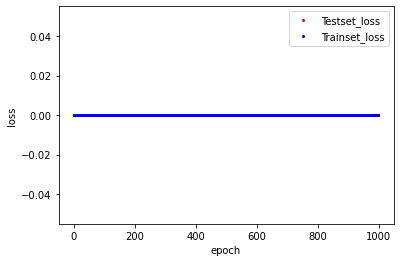

In [9]:
#테스트셋 오차 : 빨간색, 학습셋의 오차 : 파란색
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()